### [산점도 - 버블 그래프]
- 두 개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [1]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
from matplotlib import rc

In [2]:
# [2] 데이터 준비
F_DATA=r'C:\KDT\EX_PANDAS\DATAS\auto_mpg.csv'

# 적용할 폰트 파일
FONT_FILE=r'C:\Windows\Fonts\NanumGothic.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [3]:
# [3] CSV => DataFrame으로 저장
dataDF=pd.read_csv(F_DATA)

In [4]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2)

-0.83

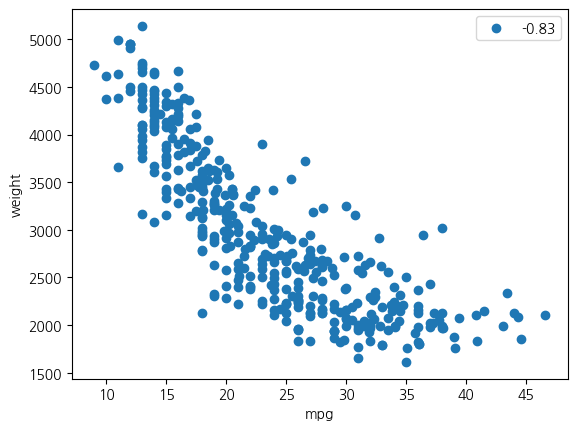

In [6]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg,dataDF.weight,label=f"{round(corrSR['weight'],2)}")
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

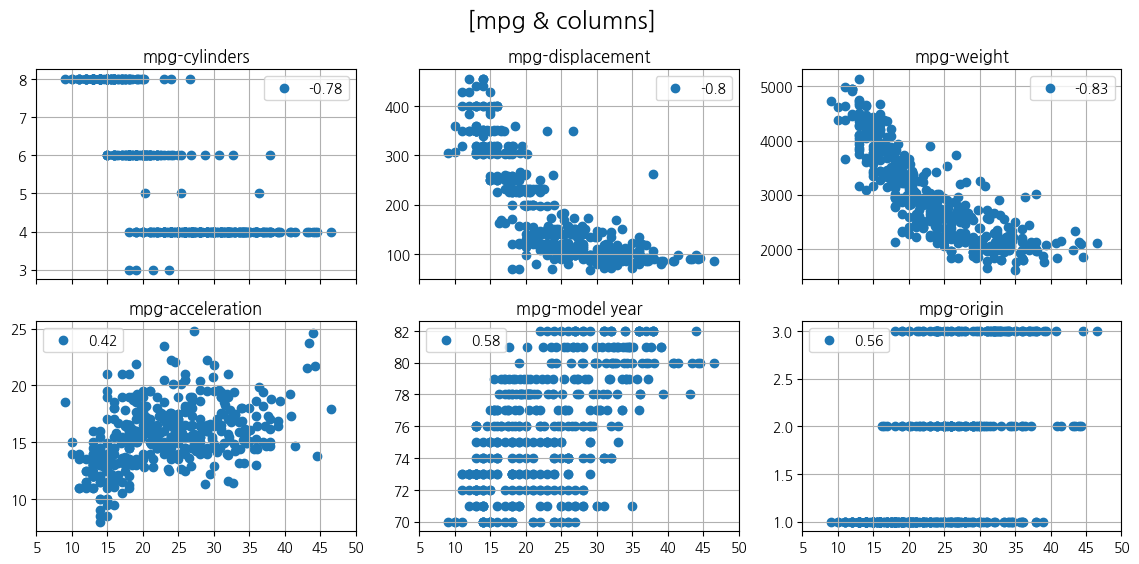

In [7]:
# - [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화
# - (1)그래프 담을 창 생성
fig=plt.figure(figsize=(14, 6))

# - (2)그래프 담을 공간 생성 axes
axes=fig.subplots(2,3,sharex=True)

# - subplot에 그래프 넣기
for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axes[row,col].scatter(dataDF['mpg'],dataDF[col_name],label=f"{round(corrSR[col_name],2)}")
        axes[row,col].set_title(f'mpg-{col_name}')
        axes[row,col].set_xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
        axes[row,col].grid(True)
        axes[row,col].legend()
fig.suptitle('[mpg & columns]', fontsize=17)
plt.show()

- [5] 연비와 무게, 실린더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관관계가 높음
    * 연비와 실린더 개수도 반비례 관계

In [14]:
s=dataDF['cylinders']
s.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

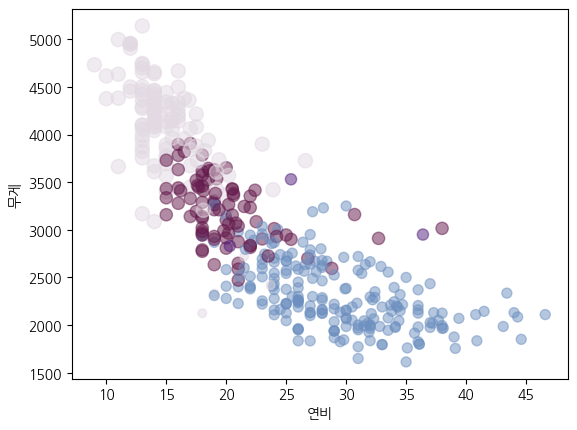

In [19]:
# - mpg와 weight 관계 산점도(scatter) 시각화
plt.scatter(dataDF.mpg,dataDF.weight,s*13,c=s,cmap='twilight',alpha=0.5)
plt.xlabel('연비')
plt.ylabel('무게')
plt.show()